In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max.columns', 20)
pd.set_option('display.max.rows', 1000)
pd.set_option("display.float_format", lambda x: "%.2f" % x )

### Load The Dataset

In [22]:
df = pd.read_csv("dataset.csv")
df

,STATE,REGION,APC,APC %,PDP,PDP %,LP,LP %,NNPP,NNPP %,OTHERS,OTHERS %,HIGHEST VOTES,PARTY WITH HIGHEST VOTES,HIGHEST PERCENTAGE,TOTAL VOTES COUNTED
0,ABIA,South East,8914,2.40,22676,6.10,327095,88.40,1239,0.30,10113,2.70,327095,LP,88.40,370037
1,ADAMAWA,North East,182881,25.00,417611,57.10,105648,14.40,8006,1.10,16994,2.30,417611,PDP,57.10,731140
2,AKWA IBOM,South South,160620,28.90,214012,38.60,132683,23.90,7796,1.40,39978,7.20,214012,PDP,38.60,555089
3,ANAMBRA,South East,5111,0.80,9036,1.50,584621,95.20,1967,0.30,13126,2.10,584621,LP,95.20,613861
4,BAUCHI,North East,316694,37.10,426607,50.00,27373,3.20,72103,8.40,10739,1.30,426607,PDP,50.00,853516
5,BAYELSA,South South,42572,25.80,68818,41.60,49975,30.20,540,0.30,3420,2.10,68818,PDP,41.60,165325
6,BENUE,North Central,310468,40.30,130081,16.90,308372,40.00,4740,0.60,16414,2.10,310468,APC,40.30,770075
7,BORNO,North East,252282,54.20,190921,41.00,7205,1.50,4626,1.00,10253,2.20,252282,APC,54.20,465287
8,CROSS RIVER,South South,130520,31.30,95425,22.90,179917,43.10,1644,0.40,9462,2.30,179917,LP,43.10,416968
9,DELTA,South South,90183,14.70,161600,26.30,341866,55.60,3122,0.50,18570,3.00,341866,LP,55.60,615341


In [23]:
df.shape

(37, 16)

#### Create a staging dataset

In [24]:
df1 = df.copy()
df1

,STATE,REGION,APC,APC %,PDP,PDP %,LP,LP %,NNPP,NNPP %,OTHERS,OTHERS %,HIGHEST VOTES,PARTY WITH HIGHEST VOTES,HIGHEST PERCENTAGE,TOTAL VOTES COUNTED
0,ABIA,South East,8914,2.40,22676,6.10,327095,88.40,1239,0.30,10113,2.70,327095,LP,88.40,370037
1,ADAMAWA,North East,182881,25.00,417611,57.10,105648,14.40,8006,1.10,16994,2.30,417611,PDP,57.10,731140
2,AKWA IBOM,South South,160620,28.90,214012,38.60,132683,23.90,7796,1.40,39978,7.20,214012,PDP,38.60,555089
3,ANAMBRA,South East,5111,0.80,9036,1.50,584621,95.20,1967,0.30,13126,2.10,584621,LP,95.20,613861
4,BAUCHI,North East,316694,37.10,426607,50.00,27373,3.20,72103,8.40,10739,1.30,426607,PDP,50.00,853516
5,BAYELSA,South South,42572,25.80,68818,41.60,49975,30.20,540,0.30,3420,2.10,68818,PDP,41.60,165325
6,BENUE,North Central,310468,40.30,130081,16.90,308372,40.00,4740,0.60,16414,2.10,310468,APC,40.30,770075
7,BORNO,North East,252282,54.20,190921,41.00,7205,1.50,4626,1.00,10253,2.20,252282,APC,54.20,465287
8,CROSS RIVER,South South,130520,31.30,95425,22.90,179917,43.10,1644,0.40,9462,2.30,179917,LP,43.10,416968
9,DELTA,South South,90183,14.70,161600,26.30,341866,55.60,3122,0.50,18570,3.00,341866,LP,55.60,615341


## Data Cleaning and Standardization

### Standardizing the column title

The column title is changed to
- Lower Case
- Snake Case
- The % is changed to pct

In [25]:
df1.columns = df1.columns.str.lower()
df1.columns = df1.columns.str.replace(" ", "_")
df1.columns = df1.columns.str.replace("%", "pct")

In [26]:
df1

,state,region,apc,apc_pct,pdp,pdp_pct,lp,lp_pct,nnpp,nnpp_pct,others,others_pct,highest_votes,party_with_highest_votes,highest_percentage,total_votes_counted
0,ABIA,South East,8914,2.40,22676,6.10,327095,88.40,1239,0.30,10113,2.70,327095,LP,88.40,370037
1,ADAMAWA,North East,182881,25.00,417611,57.10,105648,14.40,8006,1.10,16994,2.30,417611,PDP,57.10,731140
2,AKWA IBOM,South South,160620,28.90,214012,38.60,132683,23.90,7796,1.40,39978,7.20,214012,PDP,38.60,555089
3,ANAMBRA,South East,5111,0.80,9036,1.50,584621,95.20,1967,0.30,13126,2.10,584621,LP,95.20,613861
4,BAUCHI,North East,316694,37.10,426607,50.00,27373,3.20,72103,8.40,10739,1.30,426607,PDP,50.00,853516
5,BAYELSA,South South,42572,25.80,68818,41.60,49975,30.20,540,0.30,3420,2.10,68818,PDP,41.60,165325
6,BENUE,North Central,310468,40.30,130081,16.90,308372,40.00,4740,0.60,16414,2.10,310468,APC,40.30,770075
7,BORNO,North East,252282,54.20,190921,41.00,7205,1.50,4626,1.00,10253,2.20,252282,APC,54.20,465287
8,CROSS RIVER,South South,130520,31.30,95425,22.90,179917,43.10,1644,0.40,9462,2.30,179917,LP,43.10,416968
9,DELTA,South South,90183,14.70,161600,26.30,341866,55.60,3122,0.50,18570,3.00,341866,LP,55.60,615341


### Melt the party colums to one column PARTY and the values VOTES

Compress the 'apc', 'pdp', 'lp', 'nnpp', 'others' columns into **party** column  
and their values into **votes** column

In [27]:
df2 = df1.melt(id_vars = ['state', 'region', 'highest_votes','total_votes_counted'], 
               value_vars = ['apc', 'pdp', 'lp', 'nnpp', 'others'], 
               ignore_index = True,
               var_name='party', value_name = 'votes').sort_values(by = 'state').reset_index(drop = True)
df2

,state,region,highest_votes,total_votes_counted,party,votes
0,ABIA,South East,327095,370037,apc,8914
1,ABIA,South East,327095,370037,nnpp,1239
2,ABIA,South East,327095,370037,others,10113
3,ABIA,South East,327095,370037,pdp,22676
4,ABIA,South East,327095,370037,lp,327095
5,ADAMAWA,North East,417611,731140,others,16994
6,ADAMAWA,North East,417611,731140,lp,105648
7,ADAMAWA,North East,417611,731140,nnpp,8006
8,ADAMAWA,North East,417611,731140,apc,182881
9,ADAMAWA,North East,417611,731140,pdp,417611


### Create the vote percentage column

The votes percentage will represent vote percentage per stage

In [28]:
df2['votes_pct'] = (df2['votes'] / df2['total_votes_counted']) * 100
df2

,state,region,highest_votes,total_votes_counted,party,votes,votes_pct
0,ABIA,South East,327095,370037,apc,8914,2.41
1,ABIA,South East,327095,370037,nnpp,1239,0.33
2,ABIA,South East,327095,370037,others,10113,2.73
3,ABIA,South East,327095,370037,pdp,22676,6.13
4,ABIA,South East,327095,370037,lp,327095,88.40
5,ADAMAWA,North East,417611,731140,others,16994,2.32
6,ADAMAWA,North East,417611,731140,lp,105648,14.45
7,ADAMAWA,North East,417611,731140,nnpp,8006,1.10
8,ADAMAWA,North East,417611,731140,apc,182881,25.01
9,ADAMAWA,North East,417611,731140,pdp,417611,57.12


### Sort Values and rearrge columns

In [30]:
df2 = df2.sort_values(by = ['state', 'party'], ascending = [True, True]).reset_index(drop = True)
df2 = df2[['state', 'region', 'party', 'votes', 'votes_pct', 'highest_votes', 'total_votes_counted']]
df2

,state,region,party,votes,votes_pct,highest_votes,total_votes_counted
0,ABIA,South East,apc,8914,2.41,327095,370037
1,ABIA,South East,lp,327095,88.40,327095,370037
2,ABIA,South East,nnpp,1239,0.33,327095,370037
3,ABIA,South East,others,10113,2.73,327095,370037
4,ABIA,South East,pdp,22676,6.13,327095,370037
5,ADAMAWA,North East,apc,182881,25.01,417611,731140
6,ADAMAWA,North East,lp,105648,14.45,417611,731140
7,ADAMAWA,North East,nnpp,8006,1.10,417611,731140
8,ADAMAWA,North East,others,16994,2.32,417611,731140
9,ADAMAWA,North East,pdp,417611,57.12,417611,731140


### Check Shape

In [12]:
df3.shape

(185, 7)

### Check for duplicate records

In [34]:
df2.duplicated().sum()

0

### Check for null values

In [37]:
df2.isnull().sum()

state                  0
region                 0
party                  0
votes                  0
votes_pct              0
highest_votes          0
total_votes_counted    0
dtype: int64

### Check the data type

In [38]:
df2.dtypes

state                   object
region                  object
party                   object
votes                    int64
votes_pct              float64
highest_votes            int64
total_votes_counted      int64
dtype: object

### Save to dataset_clean.csv

In [39]:
df2.to_csv("dataset_clean.csv", index = False, float_format = "%.2f")

## EDA

In [51]:
df_eda = df2.copy()
df_eda0 = df2.copy()

In [79]:
df_eda.head(10)

,state,region,party,votes,votes_pct,highest_votes,total_votes_counted
0,ABIA,South East,apc,8914,2.41,327095,370037
1,ABIA,South East,lp,327095,88.40,327095,370037
2,ABIA,South East,nnpp,1239,0.33,327095,370037
3,ABIA,South East,others,10113,2.73,327095,370037
4,ABIA,South East,pdp,22676,6.13,327095,370037
5,ADAMAWA,North East,apc,182881,25.01,417611,731140
6,ADAMAWA,North East,lp,105648,14.45,417611,731140
7,ADAMAWA,North East,nnpp,8006,1.10,417611,731140
8,ADAMAWA,North East,others,16994,2.32,417611,731140
9,ADAMAWA,North East,pdp,417611,57.12,417611,731140


### Overview

In [52]:
df_eda.describe(include=[np.number])

,votes,votes_pct,highest_votes,total_votes_counted
count,185.00,185.00,185.00,185.00
mean,129939.37,20.00,348499.65,649696.84
std,163155.77,22.53,158794.49,310571.16
min,264.00,0.09,68818.00,165325.00
25%,9263.00,1.77,252282.00,465287.00
50%,56217.00,7.74,327095.00,555089.00
75%,198567.00,37.10,421390.00,770075.00
max,997279.00,95.24,997279.00,1702005.00


In [53]:
df_eda.describe(include=[object])

,state,region,party
count,185,185,185
unique,37,6,5
top,ABIA,North Central,apc
freq,5,35,37


In [54]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                185 non-null    object 
 1   region               185 non-null    object 
 2   party                185 non-null    object 
 3   votes                185 non-null    int64  
 4   votes_pct            185 non-null    float64
 5   highest_votes        185 non-null    int64  
 6   total_votes_counted  185 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 10.2+ KB


In [55]:
df_eda.columns.to_list()

['state',
 'region',
 'party',
 'votes',
 'votes_pct',
 'highest_votes',
 'total_votes_counted']

In [56]:
df_eda.dtypes

state                   object
region                  object
party                   object
votes                    int64
votes_pct              float64
highest_votes            int64
total_votes_counted      int64
dtype: object

### Globals

In [394]:
# regions = unique list of regions
# parties = unique list of participating parties
# states = unique list of states by region

df_regions = pd.DataFrame(df_eda['region'].unique(), columns = ['region']).sort_values(by = 'region', ascending = True).reset_index(drop = True)
df_parties = pd.DataFrame(df_eda['party'].unique(), columns = ['party']).sort_values(by = 'party', ascending = True).reset_index(drop = True)
df_states = df_eda[['state', 'region']]
df_states = df_states.drop_duplicates().sort_values(by = 'state', ascending = True).reset_index(drop = True)
df_states

,state,region
0,ABIA,South East
1,ADAMAWA,North East
2,AKWA IBOM,South South
3,ANAMBRA,South East
4,BAUCHI,North East
5,BAYELSA,South South
6,BENUE,North Central
7,BORNO,North East
8,CROSS RIVER,South South
9,DELTA,South South


In [74]:
total_sum_votes_counted = df_eda['votes'].sum()
total_sum_votes_counted

24038783

In [77]:
party_color = {
    "pdp": "red",
    "apc": "green",
    "lp": "orange",
    "nnpp": "purple",
    "others": "blue"
}

In [102]:
#Color Palette of 50 colors
color_palette_50 =  [
    'red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan',
    'gold', 'teal', 'navy', 'magenta', 'lime', 'coral', 'indigo', 'salmon', 'maroon', 'turquoise',
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99',
    '#e31a1c', '#fdbf6f', '#ff9896', '#c5b0d5', '#c49c94',
    '#9edae5', '#f7b6d2', '#dbdb8d', '#aec7e8', '#ffbb78',
    '#98df8a', '#ff6347', '#40e0d0', '#da70d6', '#87ceeb'
]


### 1. Voting Performance By Region

In [188]:
df_RegionVoteSum = pd.DataFrame(df_eda.groupby(['region'])['votes'].sum()).reset_index()
df_RegionVoteSum
df_regionstatecount = pd.DataFrame(df_eda.groupby(['region'])['state'].nunique()).reset_index()
df_regionstatecount
df_RegionVoteSum = df_RegionVoteSum.merge(df_regionstatecount, on = ['region'])
df_RegionVoteSum['votes_pct'] = (df_RegionVoteSum['votes'] / df_RegionVoteSum['votes'].sum()) * 100
df_RegionVoteSum = df_RegionVoteSum.sort_values(['votes_pct'], ascending = False).reset_index(drop = True)
df_RegionVoteSum = df_RegionVoteSum.rename(columns = {
    "state":"state_count"
})
df_RegionVoteSum = df_RegionVoteSum[['region', 'votes', 'votes_pct', 'state_count']]
df_RegionVoteSum

,region,votes,votes_pct,state_count
0,North West,6690622,27.83,7
1,North Central,4564332,18.99,7
2,South West,4253442,17.69,6
3,North East,3439741,14.31,6
4,South South,2857640,11.89,6
5,South East,2233006,9.29,5


#### Visualization

In [ ]:
np.random.shuffle(color_palette_50)

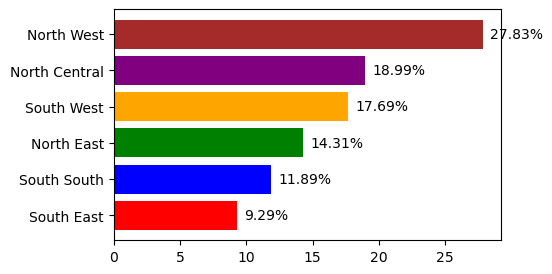

In [193]:
plt_df = df_RegionVoteSum
plt_df = plt_df.sort_values(['votes_pct'], ascending = True)
plt1 = plt.figure(figsize = (5,3))

bar = plt.barh(plt_df['region'], plt_df['votes_pct'], color = color_palette_50)
plt.bar_label(bar, ["{:.2f}%".format(x) for x in plt_df['votes_pct']], rotation = "horizontal", padding = 5, color = "#000")
plt.show()

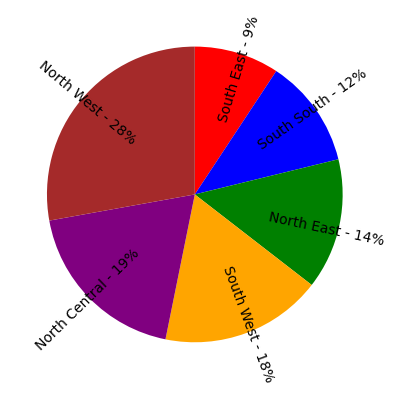

In [194]:
plt2 = plt.figure()
plt.pie(plt_df['votes_pct'], 
        radius=1, 
        startangle= 90, 
        colors =color_palette_50,
        counterclock = False, 
        labeldistance = 0.5, 
        rotatelabels = True, 
        labels = ["{} - {:.0f}%".format(x, plt_df[plt_df['region'] == x]['votes_pct'].values[0]) for x in plt_df['region']])
plt.show()

### 2. Party Performance by region

In [133]:
df_RegionPartyVoteSum = df_eda.groupby(['region', 'party'])[['votes', 'total_votes_counted']].sum()
df_RegionPartyVoteSum['votes_pct'] = (df_RegionPartyVoteSum['votes'] / df_RegionPartyVoteSum['total_votes_counted']) * 100
df_RegionPartyVoteSum

votes  total_votes_counted  votes_pct
region        party                                          
North Central apc     1760993              4564332      38.58
              lp      1415557              4564332      31.01
              nnpp      60057              4564332       1.32
              others   165638              4564332       3.63
              pdp     1162087              4564332      25.46
North East    apc     1185458              3439741      34.46
              lp       315107              3439741       9.16
              nnpp     126343              3439741       3.67
              others    70987              3439741       2.06
              pdp     1741846              3439741      50.64
North West    apc     2652235              6690622      39.64
              lp       350182              6690622       5.23
              nnpp    1268250              6690622      18.96
              others    90415              6690622       1.35
              pdp     2329540              6690622      34.82
South East    apc      127605              2233006       5.71
              lp      1960589              2233006      87.80
              nnpp       8227              2233006       0.37
              others    45387              2233006       2.03
              pdp       91198              2233006       4.08
South South   apc      799957              2857640      27.99
              lp      1210675              2857640      42.37
              nnpp      17167              2857640       0.60
              others   111933              2857640       3.92
              pdp      717908              2857640      25.12
South West    apc     2279407              4253442      53.59
              lp       846478              4253442      19.90
              nnpp      16644              4253442       0.39
              others   168972              4253442       3.97
              pdp      941941              4253442      22.15

#### Visualization

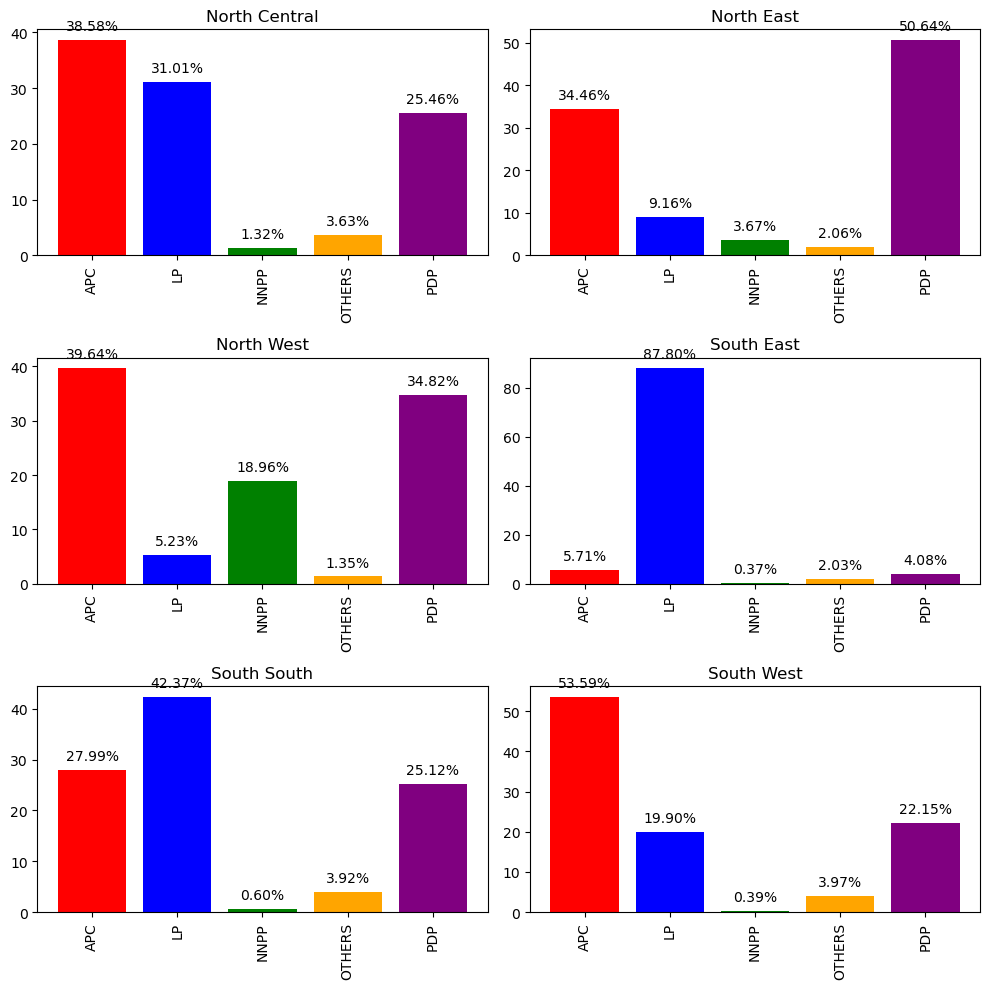

In [191]:
plt_df = df_RegionPartyVoteSum
plt3 = plt.figure(figsize = (10,10))
subplot_id = 321
for region in df_regions['region']:
    this_df = plt_df.loc[region].reset_index() #.sort_values(['votes_pct'], ascending = False)
    plt.subplot(subplot_id)
    bar = plt.bar(this_df['party'].str.upper(), this_df['votes_pct'], color = color_palette_50)
    plt.bar_label(bar, ["{:.2f}%".format(x) for x in this_df['votes_pct']], rotation = "horizontal", padding = 5, color = "#000")
    
    subplot_id = subplot_id + 1
    plt.title(region)
    plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

### 3. Voting Performance by States

In [190]:
# state
# votes = sum of the total votes in the state
# votes_pct = percentage votes of the state compared to other states

df_StateVotes = pd.DataFrame(df_eda.groupby(['state'])['votes'].sum()).reset_index()
df_StateVotes['votes_pct'] = (df_StateVotes['votes'] / df_StateVotes['votes'].sum()) * 100
df_StateVotes = df_StateVotes.sort_values(['votes_pct'], ascending = False).reset_index(drop = True)
df_StateVotes

,state,votes,votes_pct
0,KANO,1702005,7.08
1,KADUNA,1360153,5.66
2,LAGOS,1271451,5.29
3,PLATEAU,1088170,4.53
4,KATSINA,1058673,4.40
5,JIGAWA,920531,3.83
6,BAUCHI,853516,3.55
7,OYO,809485,3.37
8,NIGER,778668,3.24
9,BENUE,770075,3.20


#### Visualization

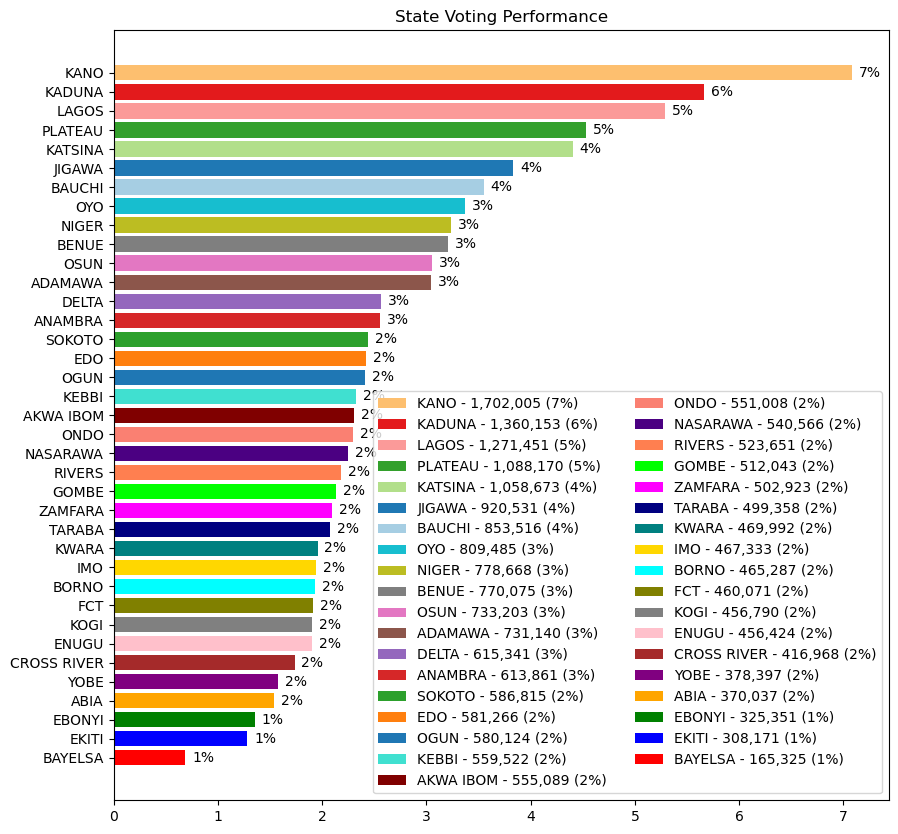

In [266]:
plt_df = df_StateVotes.sort_values(['votes_pct'], ascending = True)
plt4 = plt.figure(figsize = (10,10))
bar = plt.barh(plt_df['state'], plt_df['votes_pct'], color = color_palette_50, label = ["{} - {:,} ({:.0f}%)".format(plt_df.loc[x]['state'], plt_df.loc[x]['votes'], plt_df.loc[x]['votes_pct']) for x in plt_df.index])
plt.bar_label(bar, ["{:.0f}%".format(x) for x in plt_df['votes_pct']], rotation = "horizontal", padding = 5, color = "#000")
plt.title("State Voting Performance")
plt.xticks(rotation='horizontal')
plt.legend(loc = "lower right", ncols = 2, reverse = True)
plt.show()

### 4. Party performance by states

In [267]:
df_StatePartyHighest = df_eda.query('highest_votes == votes')
df_StatePartyHighest = df_StatePartyHighest.sort_values(['votes_pct'], ascending = False)
df_StatePartyHighest = df_StatePartyHighest.reset_index(drop = True)
df_StatePartyHighest

,state,region,party,votes,votes_pct,highest_votes,total_votes_counted
0,ANAMBRA,South East,lp,584621,95.24,584621,613861
1,ENUGU,South East,lp,428640,93.91,428640,456424
2,ABIA,South East,lp,327095,88.40,327095,370037
3,EBONYI,South East,lp,259738,79.83,259738,325351
4,IMO,South East,lp,360495,77.14,360495,467333
5,ONDO,South West,apc,369924,67.14,369924,551008
6,EKITI,South West,apc,201494,65.38,201494,308171
7,GOMBE,North East,pdp,319123,62.32,319123,512043
8,FCT,North Central,lp,281717,61.23,281717,460071
9,ZAMFARA,North West,apc,298396,59.33,298396,502923


In [433]:
df_StatePartyVoteCount = pd.DataFrame(df_StatePartyHighest.groupby(['party'])['state'].count())

df_StatePartyVoteMax = pd.DataFrame(df_StatePartyHighest.groupby(['party'])[['votes', 'votes_pct']].max())
df_StatePartyVoteMax['state'] = df_StatePartyVoteMax['votes'].apply(lambda x: df_StatePartyHighest.query("votes == {}".format(x))['state'].values[0])
df_StatePartyVoteMax['votes_pct'] = df_StatePartyVoteMax['votes'].apply(lambda x: df_StatePartyHighest.query("votes == {}".format(x))['votes_pct'].values[0])

df_StatePartyVoteSum = pd.DataFrame(df_StatePartyHighest.groupby(['party'])['votes'].sum())

df_StatePartyVoteSum = df_StatePartyVoteSum.merge(df_StatePartyVoteCount, on = ['party'])
df_StatePartyVoteSum = df_StatePartyVoteSum.merge(df_StatePartyVoteMax, on = ['party'])
df_StatePartyVoteSum = df_StatePartyVoteSum.reset_index()

df_StatePartyVoteSum = df_StatePartyVoteSum.rename(columns = {
    "votes_x": "total_votes_won",
    "state_x": "total_states_won",
    "votes_y": "maximum_votes_won",
    "state_y": "maximum_votes_state",
    "votes_pct": "maximum_votes_pct_won"
})
df_StatePartyVoteSum = df_StatePartyVoteSum[['party', 'total_votes_won', 'maximum_votes_won', 'maximum_votes_pct_won', 'total_states_won', 'maximum_votes_state']]
df_StatePartyVoteSum = df_StatePartyVoteSum.sort_values(['total_votes_won'], ascending = False)
df_StatePartyVoteSum

,party,total_votes_won,maximum_votes_won,maximum_votes_pct_won,total_states_won,maximum_votes_state
1,lp,4335339,584621,95.24,12,ANAMBRA
3,pdp,3805380,554360,40.76,12,KADUNA
0,apc,3756489,449884,55.58,12,OYO
2,nnpp,997279,997279,58.59,1,KANO


#### Visualization

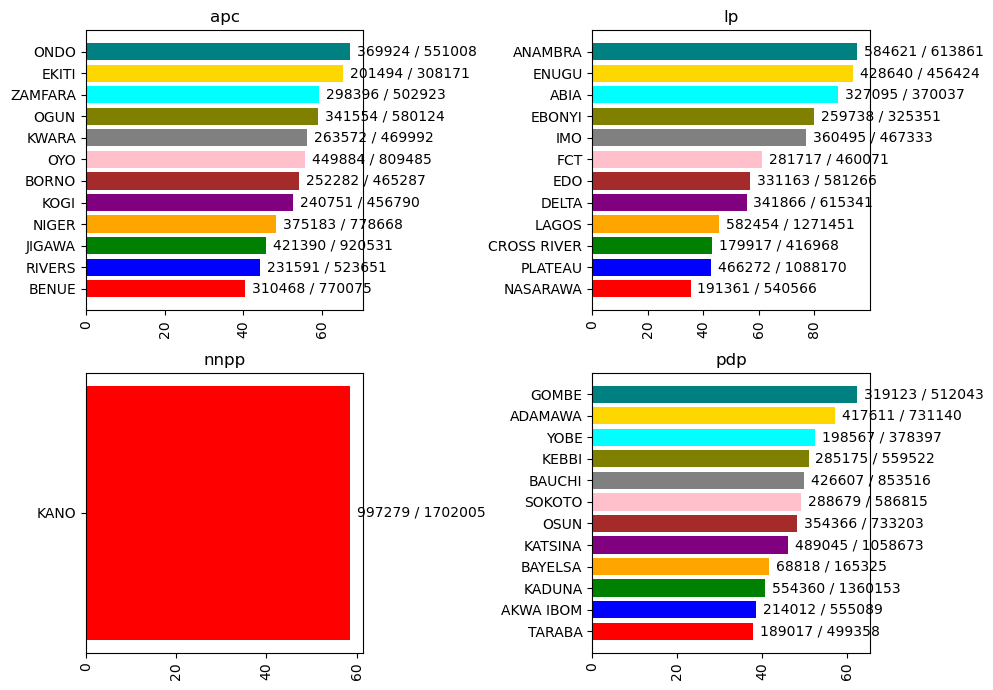

In [431]:
plt_df = df_StatePartyHighest
plt5 = plt.figure(figsize = (10,7))
subplot_id = 221
for party in df_parties['party']:
    if (party != "others") :
        this_df = plt_df.query("party == '{}'".format(party))
        this_df = this_df.sort_values(['votes_pct'], ascending = True)
        plt.subplot(subplot_id)
        bar = plt.barh(this_df['state'], this_df['votes_pct'], color = color_palette_50)
        plt.bar_label(bar, ["{:} / {:}".format(this_df.loc[x]['votes'], this_df.loc[x]['total_votes_counted']) for x in this_df.index], rotation = "horizontal", padding = 5, color = "#000")
        plt.title(party)
        subplot_id = subplot_id + 1
        plt.xticks(rotation = "vertical")
plt.tight_layout()
plt.show()

### 5. Voting Performance Nationaly

In [361]:
df_VotingPerformance = pd.DataFrame(df_eda.groupby(['party'])[['votes', 'total_votes_counted']].sum())
df_VotingPerformance = df_VotingPerformance.sort_values(by = ['votes'], ascending = False)
df_VotingPerformance['votes_pct'] = (df_VotingPerformance['votes'] / df_VotingPerformance['total_votes_counted']) * 100
df_VotingPerformance = df_VotingPerformance.reset_index()
df_VotingPerformance = df_VotingPerformance[['party', 'votes', 'votes_pct']]
df_VotingPerformance

,party,votes,votes_pct
0,apc,8805655,36.63
1,pdp,6984520,29.06
2,lp,6098588,25.37
3,nnpp,1496688,6.23
4,others,653332,2.72


#### Visualization

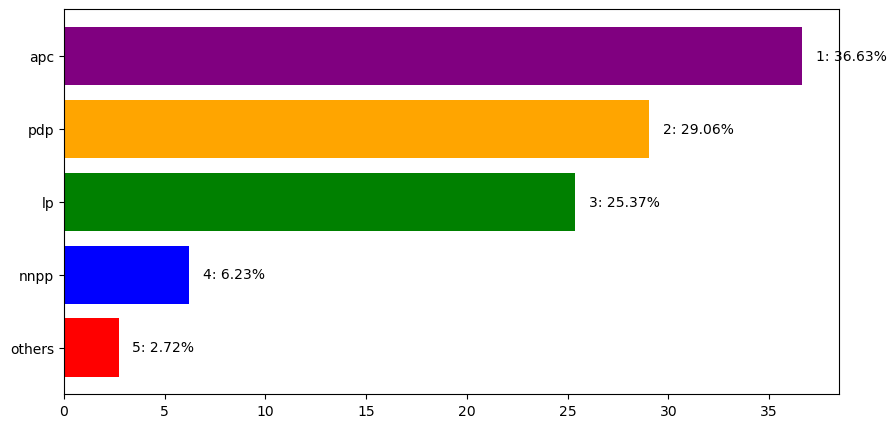

In [372]:
plt_df = df_partyDominance.sort_values(['votes_pct'], ascending = True)
plt6 = plt.figure(figsize = (10,5))
bar = plt.barh(plt_df['party'], plt_df['votes_pct'], color = color_palette_50)
plt.bar_label(bar, ["{}: {:.2f}%".format(x+1, plt_df.loc[x]['votes_pct']) for x in plt_df.index], padding = 10)
plt.show()

### 6. Party Perfomance Nationaly

In [374]:
# state = group of states by party
# party = participating parties in the state
# votes = total votes of the party in the states
# votes_pct  = percentage of the total votes of the party in the states

df_StatePartyVotes = pd.DataFrame(df_eda.groupby(["state",'party'])[['votes', 'total_votes_counted']].sum())
df_StatePartyVotes = df_StatePartyVotes.sort_values(by = ['state', 'votes'], ascending = [True, False])
df_StatePartyVotes['votes_pct'] = (df_StatePartyVotes['votes'] / df_StatePartyVotes['total_votes_counted']) * 100
df_StatePartyVotes

votes  total_votes_counted  votes_pct
state       party                                         
ABIA        lp      327095               370037      88.40
            pdp      22676               370037       6.13
            others   10113               370037       2.73
            apc       8914               370037       2.41
            nnpp      1239               370037       0.33
ADAMAWA     pdp     417611               731140      57.12
            apc     182881               731140      25.01
            lp      105648               731140      14.45
            others   16994               731140       2.32
            nnpp      8006               731140       1.10
AKWA IBOM   pdp     214012               555089      38.55
            apc     160620               555089      28.94
            lp      132683               555089      23.90
            others   39978               555089       7.20
            nnpp      7796               555089       1.40
ANAMBRA     lp      584621               613861      95.24
            others   13126               613861       2.14
            pdp       9036               613861       1.47
            apc       5111               613861       0.83
            nnpp      1967               613861       0.32
BAUCHI      pdp     426607               853516      49.98
            apc     316694               853516      37.10
            nnpp     72103               853516       8.45
            lp       27373               853516       3.21
            others   10739               853516       1.26
BAYELSA     pdp      68818               165325      41.63
            lp       49975               165325      30.23
            apc      42572               165325      25.75
            others    3420               165325       2.07
            nnpp       540               165325       0.33
BENUE       apc     310468               770075      40.32
            lp      308372               770075      40.04
            pdp     130081               770075      16.89
            others   16414               770075       2.13
            nnpp      4740               770075       0.62
BORNO       apc     252282               465287      54.22
            pdp     190921               465287      41.03
            others   10253               465287       2.20
            lp        7205               465287       1.55
            nnpp      4626               465287       0.99
CROSS RIVER lp      179917               416968      43.15
            apc     130520               416968      31.30
            pdp      95425               416968      22.89
            others    9462               416968       2.27
            nnpp      1644               416968       0.39
DELTA       lp      341866               615341      55.56
            pdp     161600               615341      26.26
            apc      90183               615341      14.66
            others   18570               615341       3.02
            nnpp      3122               615341       0.51
EBONYI      lp      259738               325351      79.83
            apc      42402               325351      13.03
            pdp      13503               325351       4.15
            others    8047               325351       2.47
            nnpp      1661               325351       0.51
EDO         lp      331163               581266      56.97
            apc     144471               581266      24.85
            pdp      89585               581266      15.41
            others   13304               581266       2.29
            nnpp      2743               581266       0.47
EKITI       apc     201494               308171      65.38
            pdp      89554               308171      29.06
            lp       11397               308171       3.70
            others    5462               308171       1.77
            nnpp       264               308171       0.09
ENUGU       lp      428640               456424      93.91
         

#### Visualization

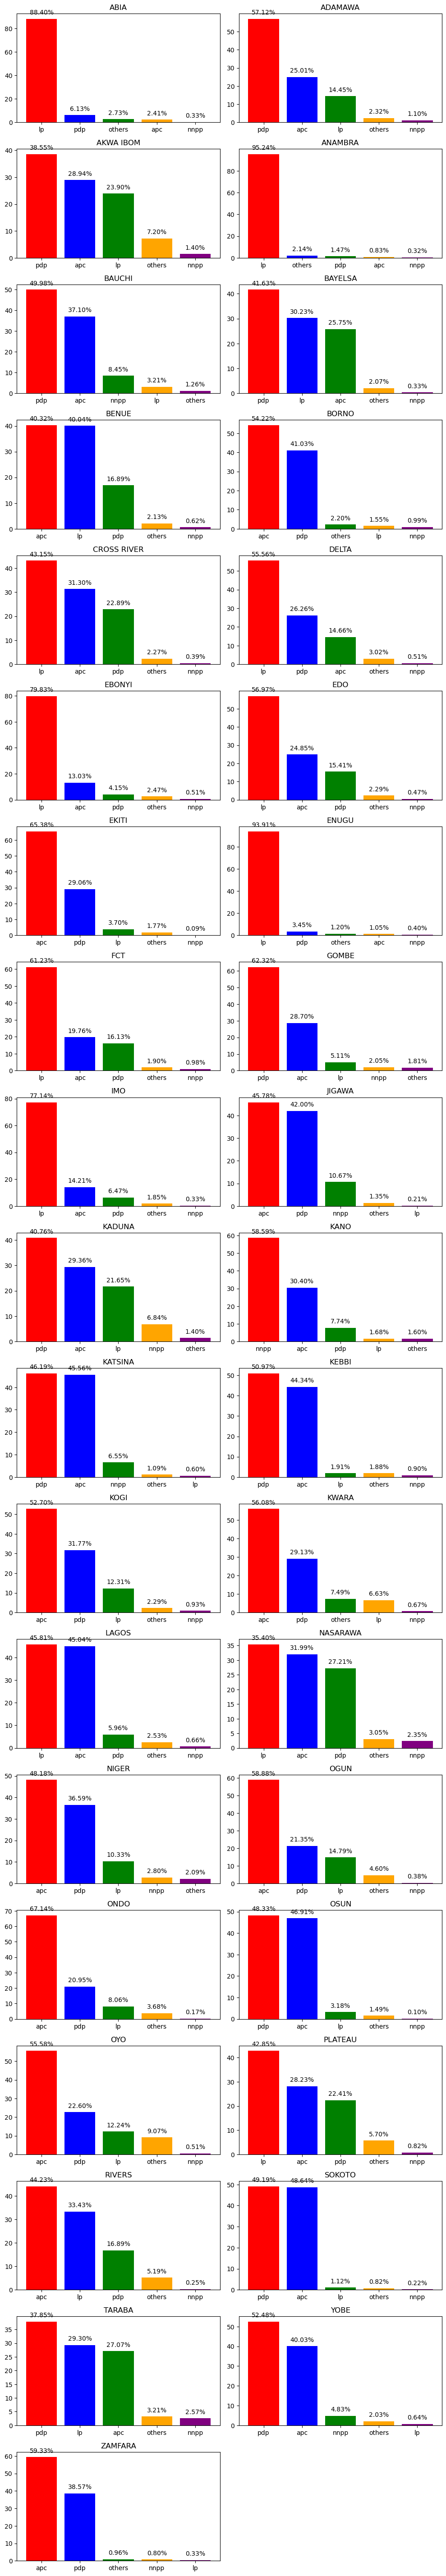

In [408]:
plt_df = df_StatePartyVotes
plt7 = plt.figure(figsize = (10,60))
subplot_id = 1
selected_states = df_states.query("region == 'South West'")
apc_states = df_StatePartyHighest.query("party == 'apc'")

for iState in df_states['state']:
    plt.subplot(20,2,subplot_id)
    #print(subplot_id)
    this_df = df_StatePartyVotes.loc[iState].reset_index().sort_values(['votes_pct'], ascending = False)
    #print(this_df)
    bar = plt.bar(this_df['party'], this_df['votes_pct'], color = color_palette_50)
    plt.bar_label(bar, ["{:.2f}%".format(this_df.loc[x]['votes_pct']) for x in this_df.index], rotation = "horizontal", padding = 5, color = "#000")
    plt.title(iState)
    subplot_id = subplot_id + 1
plt.tight_layout()
plt.show()